#<center>EUROPEAN SOCCER DATABASE</center>

In [7]:
#import libraries
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#load first dataset
df_mpm = pd.read_csv('/content/match_per_month.csv')
df_mpm

,Tot_match,Month
0,2969,4
1,2834,2
2,2785,3
3,2739,11
4,2608,10
5,2575,9
6,2524,12
7,2276,8
8,2245,5
9,2183,1


In [9]:
#define a function that takes a month number as input and returns the name of the corresponding month using calendar.month_name
def get_month_name(month_number):
    return calendar.month_name[month_number]
df_mpm['Month_name'] = df_mpm['Month'].apply(get_month_name)
df_mpm


,Tot_match,Month,Month_name
0,2969,4,April
1,2834,2,February
2,2785,3,March
3,2739,11,November
4,2608,10,October
5,2575,9,September
6,2524,12,December
7,2276,8,August
8,2245,5,May
9,2183,1,January


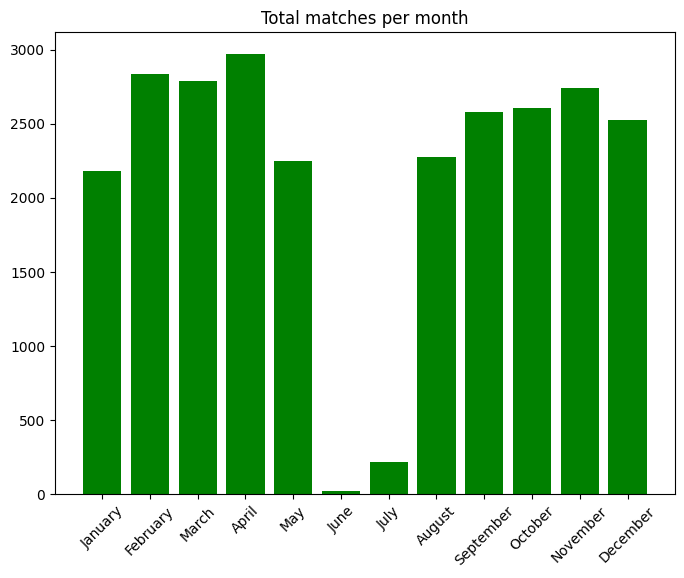

In [10]:
#Creating a sorted list of month from January to December
ordered_month_names = [calendar.month_name[i] for i in range(1, 13)]

#Use pd.Categorical to set the 'Month_name' column as an ordered category, specifying the order of values ​​via the ordered_month_names list
df_mpm['Month_name'] = pd.Categorical(df_mpm['Month_name'], categories=ordered_month_names, ordered=True)
df_mpm = df_mpm.sort_values(by='Month_name')

#create the graph
plt.figure(figsize=(8, 6))
plt.bar(df_mpm['Month_name'], df_mpm['Tot_match'], width=0.8, color='g')
plt.xticks(rotation=45)
plt.title('Total matches per month')
plt.show()


In [11]:
#load dataset players
df_pl = pd.read_csv('/content/player.csv')
df_pl


,id,player_api_id,player_name,birthday,height,weight
0,2868,451335,Edmilson Fernandes,1996-04-15 00:00:00.000000 UTC,190.50,154
1,2901,144989,Efe Ambrose,1988-10-18 00:00:00.000000 UTC,190.50,154
2,8840,575789,Reece Oxford,1998-12-16 00:00:00.000000 UTC,190.50,157
3,18,23499,Aaron Wilbraham,1979-10-21 00:00:00.000000 UTC,190.50,159
4,4928,523414,Jhonder Cadiz,1995-07-29 00:00:00.000000 UTC,190.50,161
...,...,...,...,...,...,...
11055,2272,30340,Darius Vassell,1980-06-30 00:00:00.000000 UTC,170.18,170
11056,6733,29340,Marco Sailer,1985-11-16 00:00:00.000000 UTC,170.18,170
11057,6923,32343,Markus Neumayr,1986-03-26 00:00:00.000000 UTC,170.18,170
11058,10750,38831,Wayne Routledge,1985-01-07 00:00:00.000000 UTC,170.18,170


In [12]:
#convert the weight from pounds to kg
df_pl['weight_kg'] = df_pl['weight'] * 0.45359237

###Check the values for height and weight of the players.

<Axes: xlabel='height'>

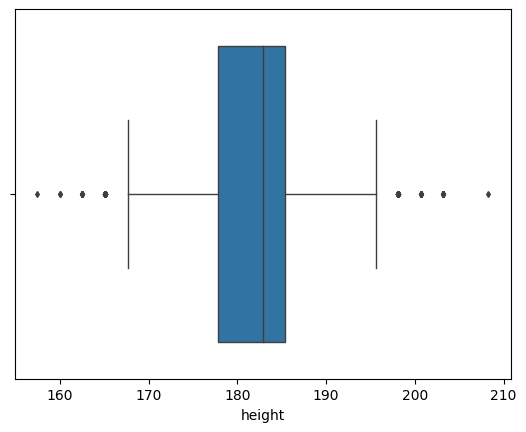

In [13]:
sns.boxplot(x = 'height', data = df_pl, fliersize=3, linewidth=1)

<Axes: xlabel='weight_kg'>

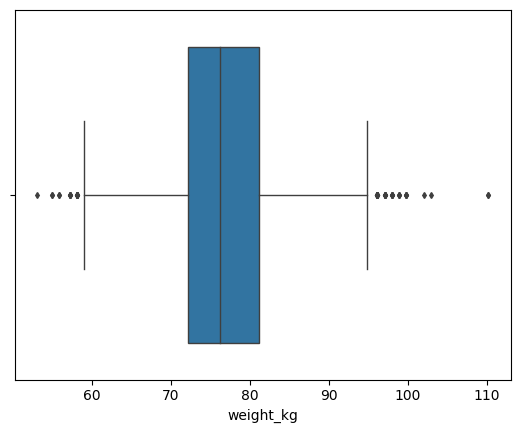

In [14]:
sns.boxplot(x = 'weight_kg', data = df_pl, fliersize=3, linewidth=1)

###There are correlations between height and weight of the players?

In [19]:
#run correlation matrix
corr_matrix = df_pl.corr()
corr_matrix

<ipython-input-19-54bae733d19b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_pl.corr()


,id,player_api_id,height,weight,weight_kg
id,1.000000,-0.006515,0.008563,0.004654,0.004654
player_api_id,-0.006515,1.000000,-0.053595,-0.164771,-0.164771
height,0.008563,-0.053595,1.000000,0.766626,0.766626
weight,0.004654,-0.164771,0.766626,1.000000,1.000000
weight_kg,0.004654,-0.164771,0.766626,1.000000,1.000000


In [25]:
row_height = "height"
column_weight = "weight"

value_corr = corr_matrix[row_height][column_weight]
print(f"The correlation between players' height and weight is very high:: {value_corr}")

The correlation between players' height and weight is very high:: 0.7666258504097673


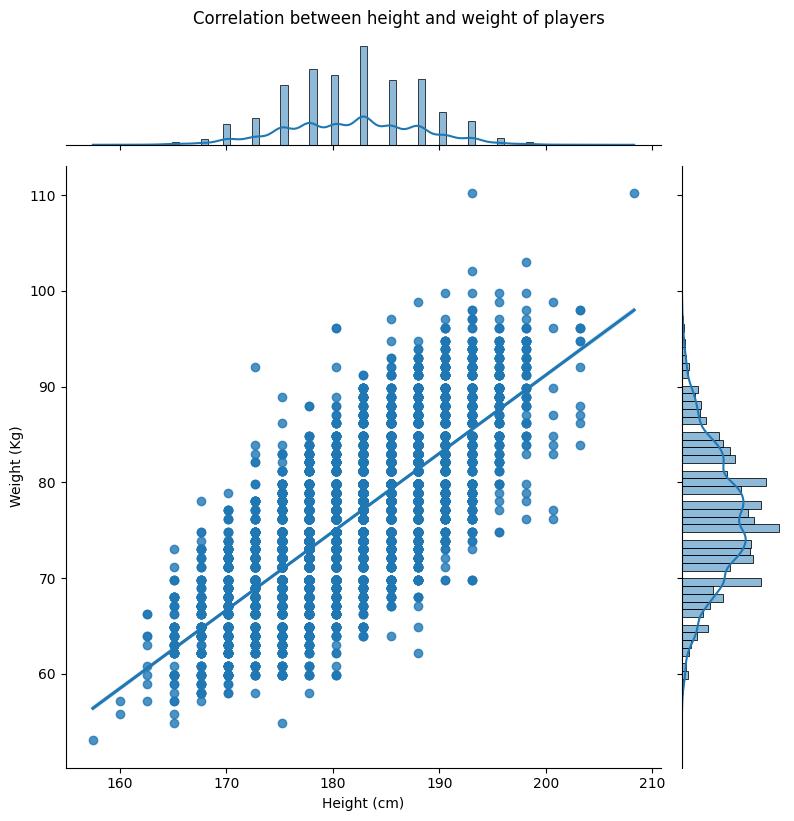

In [26]:
#create the jointplot and set the title
jointplot = sns.jointplot(data=df_pl, x="height", y="weight_kg", height=8, kind='reg')
jointplot.set_axis_labels(xlabel='Height (cm)', ylabel='Weight (Kg)')
jointplot.fig.suptitle('Correlation between height and weight of players', y=1.02)
jointplot.ax_joint.grid(False)
plt.show()
